# Working with Matplotlib
*Authored by Andrea Walker February 2021; these are my own personal tips, tricks and best practices from my experience. I make no guarantee of the accuracy of the content; however, as of the time of writing, all code works in Jupyter with Python 3.8.5 and matplotlib 3.3.2 .*

In [1]:
#optionally find out your python and matplotlib version
'''
from platform import python_version
print('python =',python_version())
import matplotlib
print('matplotlib =',matplotlib.__version__)
'''

python = 3.8.5
matplotlib = 3.3.2


## Always start with the standard imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Part I : Plotting Environments and Layouts

## Single Plots

In [3]:
#data
x = np.linspace(0,6,100)
y = np.cos(x)
y2 = np.sin(x)
rand = np.random.rand(10)

### Calling plt. \<method>() creates a new figure environment. 
Further calls to plt.\<other methods>() either plot on or modify the same figure, until plt.show() is called:

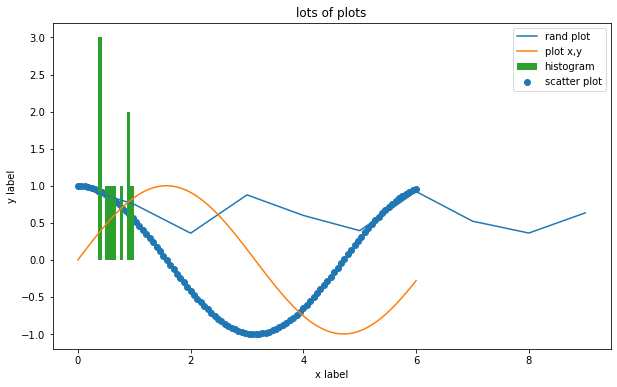

In [4]:
plt.figure(figsize=(10,6)) #optional - set figure size; automatically set otherwise
plt.plot(rand, label='rand plot')
plt.scatter(x,y,label='scatter plot')
plt.plot(x,y2,label='plot x,y')
plt.hist(rand,label='histogram')
plt.legend(loc='upper right') # creates legend; you can set the location 
plt.title('lots of plots')
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

### Note the difference when you use the same code but call plt.show() in between calling plt methods:

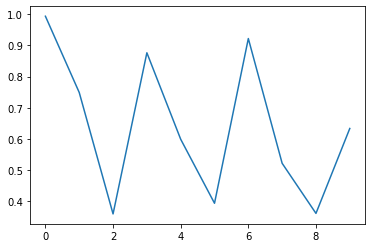

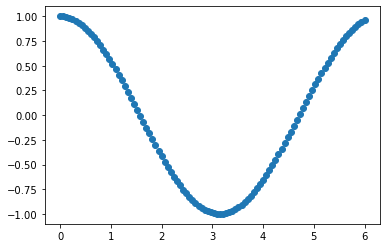

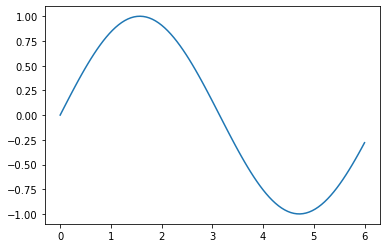

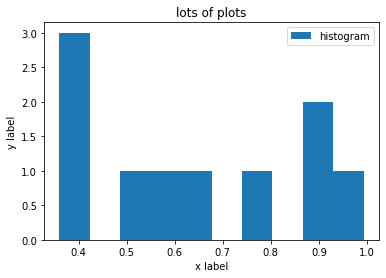

In [5]:
plt.plot(rand, label='rand plot')
plt.show()
plt.scatter(x,y,label='scatter plot')
plt.show()
plt.plot(x,y2,label='plot x,y')
plt.show()

plt.hist(rand,label='histogram')
plt.legend(loc='upper right') # creates legend; you can set the location 
plt.title('lots of plots')
plt.xlabel('x label')
plt.ylabel('y label')
plt.show()

## Within each call to a plotting method you can often change the line color, weight, marker color, weight, style, etc. Look up the Documentation / Stackexchange. 

## Non-standard / user-defined legends: 
This documentation has been super useful for custom / non-standard legends, especially the third example: 
https://matplotlib.org/stable/gallery/text_labels_and_annotations/custom_legends.html

# Multiple Plots (Working with the figure environment and subplots)

## There are two main ways I typically create multiple plots
* using fig.add_subplot()
* using plt.subplots()

### 1. fig.add_subplots() is a little more flexible. 
 First you create a figure environment, then you add subplots to it. You can add them all at the start when you create the figure, or at any time lower in the code.\
 Whenever you add a subplot, you include 3 numbers as the argument to the command: \
i.e. ax1 = fig.add_subplot(231) 

* 2  - the first number is the number of rows of the figure
* 3 - the second number is the number of columns of the figure
* 1 - the third number is the position of the subplot you are adding. The subplots are numbered row-wise, from the upper left, across the row, then the number continues in the next row. 

i.e.\
 1                       2                       3 \
 4                       5                       6 
 
 
 **One thing that is different about fig.add_subplots()  is the syntax for adding subplot axis labels and titles (as well as other commands) is different from when you are using a single plot. You might have to google around a bit.**
 
 See the example below. 

Text(0.5, 0.98, 'Overall figure title')

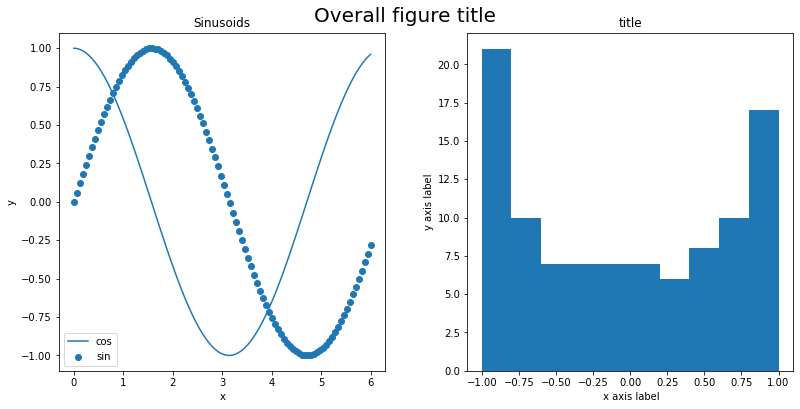

In [6]:
# Create a figure environment and define the size using the figsize argument
fig = plt.figure(figsize=(12, 12))


#Add subplots
ax1 = fig.add_subplot(221) # the three numbers are important! 
ax2 = fig.add_subplot(222, title='title',xlabel=" x axis label",ylabel='y axis label') #set title and axis labels here

###    Try uncommenting out the next two lines and see how the figure changes ###
# Try uncommenting ax4 only; then try uncommenting both. 

#ax3 = fig.add_subplot(223, title='title',xlabel=" x axis label",ylabel='y axis label')
#ax4 = fig.add_subplot(224,title='title',xlabel=" x axis label",ylabel='y axis label')
fig.subplots_adjust(hspace=0.25, wspace=0.25, left=0.1, right=0.95,
                    bottom=0.07, top=0.95)

x = np.linspace(0,6,100)
y = np.cos(x)
y2 = np.sin(x)

ax1.plot(x,y,label='cos') #label used for the legend
ax1.scatter(x,y2,label='sin')
ax1.set_title('Sinusoids') #alternate place to set title and axis labels
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend() # command to include legend

ax2.hist(y)

fig.suptitle("Overall figure title", fontsize=20) #optional overall figure title


### 2. The method plt.subplots() is a little more rigid, and defines the entire figure at the beginning

* You create a figure object with the subplots (denoted ax0, ax1 ...) all at once at the start
* plt.subplots() takes three main arguments, nrows, ncols, and figsize (I think these are intuitive enough). *note: figsize is a tuple (xdim, ydim)*
* plt.subplots returns two things: a figure object, and a tuple 
* if you have one row, this tuple will contain the subplot objects for that row
* if you have more than one row, this tuple will be composed of tuples, one for each row of the figure. Inside the tuple for each row will be the subplot objects for that row. See below for examples.



#### Subplots with one row: 

<ipython-input-7-38aa772c5a5f>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


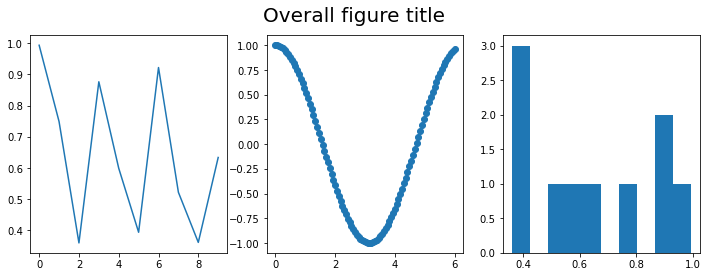

In [7]:

fig, (ax0, ax1,ax2) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
ax0.plot(rand, label='rand plot')
ax1.scatter(x,y,label='scatter plot')
ax2.hist(rand,label='histogram')
fig.suptitle("Overall figure title", fontsize=20) #optional overall figure title
fig.show()

#### Subplots with multiple rows: 


(array([3., 0., 1., 1., 1., 0., 1., 0., 2., 1.]),
 array([0.35972607, 0.42309951, 0.48647295, 0.54984639, 0.61321983,
        0.67659328, 0.73996672, 0.80334016, 0.8667136 , 0.93008705,
        0.99346049]),
 <BarContainer object of 10 artists>)

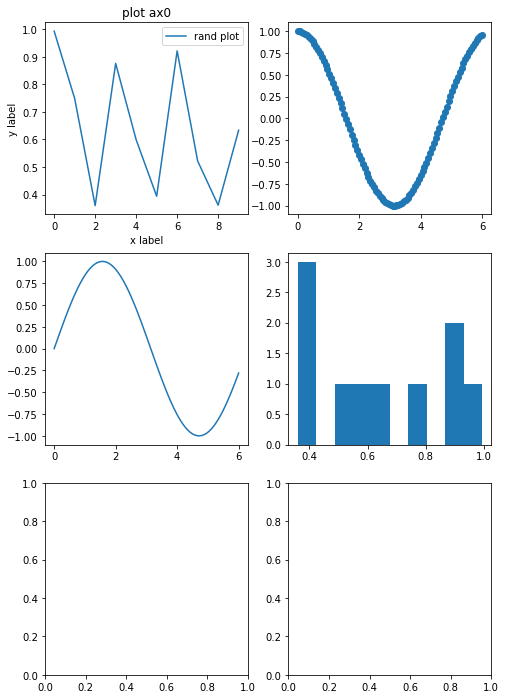

In [8]:
fig, (row0,row1,row2) = plt.subplots(nrows=3, ncols=2, figsize=(8, 12))
#extract the subplots from each row:
ax0, ax1 = row0
ax2, ax3 = row1
ax4, ax5 = row2
#do some plotting
ax0.plot(rand, label='rand plot')
ax0.set_title('plot ax0')
ax0.set_xlabel('x label')
ax0.set_ylabel('y label')
ax0.legend()
ax1.scatter(x,y,label='scatter plot')
ax2.plot(x,y2,label='plot x,y')
ax3.hist(rand,label='histogram')


# Part II : Plotting Methods

### plt.plot()
Plot y versus x as lines and/or markers.

>https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot

### plt.scatter()
A scatter plot of y vs. x with varying marker size and/or color.
> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html?highlight=scatter#matplotlib.pyplot.scatter

### plt.hist()
Plot a histogram.

Compute and draw the histogram of x. The return value is a tuple (n, bins, patches) or ([n0, n1, ...], bins, [patches0, patches1, ...]) if the input contains multiple data. See the documentation of the weights parameter to draw a histogram of already-binned data.

Multiple data can be provided via x as a list of datasets of potentially different length ([x0, x1, ...]), or as a 2D ndarray in which each column is a dataset. Note that the ndarray form is transposed relative to the list form.

Masked arrays are not supported.

The bins, range, weights, and density parameters behave as in numpy.histogram.
> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

### plt.hist2d()
Make a 2D histogram plot.
>https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist2d.html#matplotlib.pyplot.hist2d

### plt.errorbar()
Plot y versus x as lines and/or markers with attached errorbars.

x, y define the data locations, xerr, yerr define the errorbar sizes. By default, this draws the data markers/lines as well the errorbars. Use fmt='none' to draw errorbars without any data markers.
> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html?highlight=errorbar#matplotlib.pyplot.errorbar

### Happy coding! :)

# Appendix : Useful Methods

## Layout

### Automatic and Manual figure adjustment

In [ ]:
plt.tight_layout() #automatic figure and subfigure resizing

fig.subplots_adjust(hspace=0.25, wspace=0.25, left=0.1, right=0.95,
                    bottom=0.07, top=0.95) #manual adjust

In `fig.subplots_adjust()`,
* hspace is height between subplots
* wspace is width between subplots
* right, left, top, bottom are margins, I think

### Inverting axes: 

In [ ]:
plt.gca().invert_yaxis() # single plot
ax.invert_yaxis() # subplot environment

### Scaling axes / Setting axis limits:


#### `matplotlib.pyplot.xlim`
Get or set the x limits of the current axes.
>https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html

In [ ]:
left, right = xlim()  # return the current xlim
xlim((left, right))   # set the xlim to left, right
xlim(left, right)     # set the xlim to left, right

If you do not specify args, you can pass left or right as kwargs, i.e.:

In [ ]:
xlim(right=3)  # adjust the right leaving left unchanged
xlim(left=1)  # adjust the left leaving right unchanged

#### matplotlib.pyplot.ylim
Similar to xlim above. 
>https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html?highlight=ylim#matplotlib.pyplot.ylim

#### `matplotlib.pyplot.yscale`
>https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html

#### Specifically log scaling axes with negative values: 

In [ ]:
plt.yscale('symlog')

### Scaling axis aspect ratio:
`matplotlib.axes.Axes.set_aspect`
> https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_aspect.html

#### Tutorial: 
>https://matplotlib.org/stable/gallery/subplots_axes_and_figures/axis_equal_demo.html

### Overall Title for figure with multiple subplots
`fig.suptitle("Overall figure title")`
>https://matplotlib.org/stable/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.suptitle

In [ ]:
fig.suptitle("Overall figure title")
fig.suptitle("Overall figure title", fontsize=16)

### Adding text on an arbitrary location on a plot
`plt.text(x, y, s)` \
`fig.text(x, y, s,)`\
where x,y specify the position to place the text. By default, this is in data coordinates. The coordinate system can be changed using the transform parameter. \
s is the text string.
>https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

### Manually setting the xticks to non-default values / labels:

#### matplotlib.pyplot.xticks(ticks=None, labels=None, **kwargs)[source]
> Get or set the current tick locations and labels of the x-axis. \
> Pass no arguments to return the current values without modifying them.
> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html

In [ ]:
plt.xticks(ticks=None, labels=None, **kwargs)

### Annotating data points

#### matplotlib.pyplot.annotate(text, xy, *args, **kwargs)
>Annotate the point xy with text text. \
>In the simplest form, the text is placed at xy. \
>Optionally, the text can be displayed in another position xytext. An arrow pointing from the text to the annotated point xy can then be added by defining arrowprops. \
> https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html

*Useful Stackexchange article: https://stackoverflow.com/questions/22272081/label-python-data-points-on-plot*

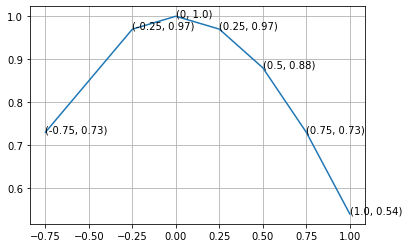

In [9]:
#from stackexchange:
fig = plt.figure()
ax = fig.add_subplot(111)

A = -0.75, -0.25, 0, 0.25, 0.5, 0.75, 1.0
B = 0.73, 0.97, 1.0, 0.97, 0.88, 0.73, 0.54

plt.plot(A,B)
for xy in zip(A, B):                                       # <--
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data') # <--

plt.grid()
plt.show()

## Plotting Shapes

### Circles
> https://stackoverflow.com/questions/9215658/plot-a-circle-with-pyplot

#### Short answer:
>A quick condensed version of the accepted answer, to quickly plug a circle into an existing plot. Refer to the accepted answer and other answers to understand the details. \
>By the way: 
> * gca() means Get Current Axis


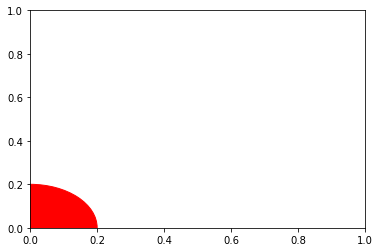

In [10]:
import matplotlib.pyplot as plt

circle1 = plt.Circle((0, 0), 0.2, color='r')
plt.gca().add_patch(circle1)

#### Longer answer (also from Stackexchange)

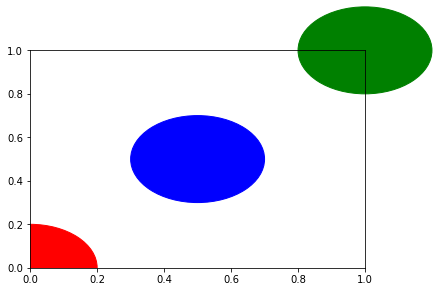

In [11]:
import matplotlib.pyplot as plt

circle1 = plt.Circle((0, 0), 0.2, color='r')
circle2 = plt.Circle((0.5, 0.5), 0.2, color='blue')
circle3 = plt.Circle((1, 1), 0.2, color='g', clip_on=False)

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)

plt.show()
#fig.savefig('plotcircles.png')

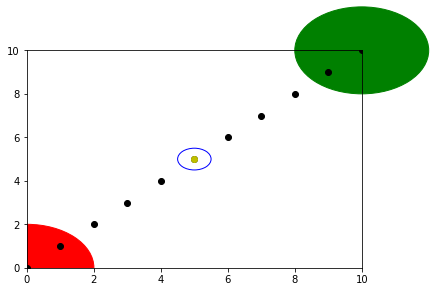

In [12]:
circle1 = plt.Circle((0, 0), 2, color='r')
# now make a circle with no fill, which is good for hi-lighting key results
circle2 = plt.Circle((5, 5), 0.5, color='b', fill=False)
circle3 = plt.Circle((10, 10), 2, color='g', clip_on=False)
    
ax = plt.gca()
ax.cla() # clear things for fresh plot

# change default range so that new circles will work
ax.set_xlim((0, 10))
ax.set_ylim((0, 10))
# some data
ax.plot(range(11), 'o', color='black')
# key data point that we are encircling
ax.plot((5), (5), 'o', color='y')
    
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)
plt.show()
#fig.savefig('plotcircles2.png')